In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import measure, draw
from scipy import ndimage as ndi
import csv
from IPython import display
from IPython.display import clear_output
import keyboard
import pandas as pd
import random

In [2]:
TBacBin = r'tomato/train/Tomato___Bacterial_spot_bin/'
TBacCol = r'Tomato diseases/train/Tomato___Bacterial_spot/'
VBacBin = r'tomato/valid/Tomato___Bacterial_spot_bin/'
VBacCol = r'Tomato diseases/valid/Tomato___Bacterial_spot/'

TEarBin = r'tomato/train/Tomato___Early_blight_bin/'
TEarCol = r'Tomato diseases/train/Tomato___Early_blight/'
VEarBin = r'tomato/valid/Tomato___Early_blight_bin/'
VEarCol = r'Tomato diseases/valid/Tomato___Early_blight/'

THeaBin = r'tomato/train/Tomato___healthy_bin/'
THeaCol = r'Tomato diseases/train/Tomato___healthy/'
VHeaBin = r'tomato/valid/Tomato___healthy_bin/'
VHeaCol = r'Tomato diseases/valid/Tomato___healthy/'

TLatBin = r'tomato/train/Tomato___Late_blight_bin/'
TLatCol = r'Tomato diseases/train/Tomato___Late_blight/'
VLatBin = r'tomato/valid/Tomato___Late_blight_bin/'
VLatCol = r'Tomato diseases/valid/Tomato___Late_blight/'

TLeaBin = r'tomato/train/Tomato___Leaf_Mold_bin/'
TLeaCol = r'Tomato diseases/train/Tomato___Leaf_Mold/'
VLeaBin = r'tomato/valid/Tomato___Leaf_Mold_bin/'
VLeaCol = r'Tomato diseases/valid/Tomato___Leaf_Mold/'

TSepBin = r'tomato/train/Tomato___Septoria_leaf_spot_bin/'
TSepCol = r'Tomato diseases/train/Tomato___Septoria_leaf_spot/'
VSepBin = r'tomato/valid/Tomato___Septoria_leaf_spot_bin/'
VSepCol = r'Tomato diseases/valid/Tomato___Septoria_leaf_spot/'

TSpiBin = r'tomato/train/Tomato___Spider_mites Two-spotted_spider_mite_bin/'
TSipCol = r'Tomato diseases/train/Tomato___Spider_mites Two-spotted_spider_mite/'
VSpiBin = r'tomato/valid/Tomato___Spider_mites Two-spotted_spider_mite_bin/'
VSipCol = r'Tomato diseases/valid/Tomato___Spider_mites Two-spotted_spider_mite/'

TTarBin = r'tomato/train/Tomato___Target_Spot_bin/'
TTarCol = r'Tomato diseases/train/Tomato___Target_Spot/'
VTarBin = r'tomato/valid/Tomato___Target_Spot_bin/'
VTarCol = r'Tomato diseases/valid/Tomato___Target_Spot/'

TMosBin = r'tomato/train/Tomato___Tomato_mosaic_virus_bin/'
TMosCol = r'Tomato diseases/train/Tomato___Tomato_mosaic_virus/'
VMosBin = r'tomato/valid/Tomato___Tomato_mosaic_virus_bin/'
VMosCol = r'Tomato diseases/valid/Tomato___Tomato_mosaic_virus/'

TYelBin = r'tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus_bin/'
TYelCol = r'Tomato diseases/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/'
VYelBin = r'tomato/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus_bin/'
VYelCol = r'Tomato diseases/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/'

input_directory = TYelBin #ruta para las máscaras de la clase a evaluar
input_directory2 = TYelCol #ruta para las imágenes de la clase a evaluar

In [3]:
files= os.listdir(input_directory)

lista=[]
for i in range (len(files)):
    image = cv2.imread(input_directory+files[i],cv2.IMREAD_GRAYSCALE)
    imagec = cv2.imread(input_directory2+files[i][:-3]+'png',cv2.COLOR_BGR2RGB)
    imagec  = cv2.cvtColor(imagec , cv2.COLOR_BGR2RGB)
    
    _, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)
    contours= measure.find_contours(mask, 0.9, fully_connected='high',
                                     positive_orientation='low')
    
    
    #contornos en hojas
    for n, contour in enumerate(contours):
        x=contour[:, 0].astype(int)
        y=contour[:, 1].astype(int)
        imagec[x, y,0]=0
        imagec[x, y,1]=0
        imagec[x, y,2]=255
        
        num = random.randint(1, 9)
        n=str(num)
        lista.append(num)
        fondo = cv2.imread('fondos/fondo'+n+'.png',cv2.COLOR_BGR2RGB) #selección de fondo
        fondo  = cv2.cvtColor(fondo , cv2.COLOR_BGR2RGB)
        fondo = cv2.resize(fondo , (300, 300)) #re escalado

        imagecc = cv2.imread(input_directory2+files[i][:-3]+'png')

        cy,cx,ch=fondo.shape

        h=0
        for h in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                if mask[h,j]==0:
                    imagecc[h, j,2]=fondo[h, j,0]
                    imagecc[h, j,1]=fondo[h, j,1]
                    imagecc[h, j,0]=fondo[h, j,2]
                    
        ima= cv2.resize(imagecc , (224, 224))
        cv2.imwrite('Tomato background/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/'+"%06.f"%i+'.png', ima) #se agrega el fondo complejo
      

(array([208., 257., 249., 227., 219., 220., 234., 267., 269.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <BarContainer object of 9 artists>)

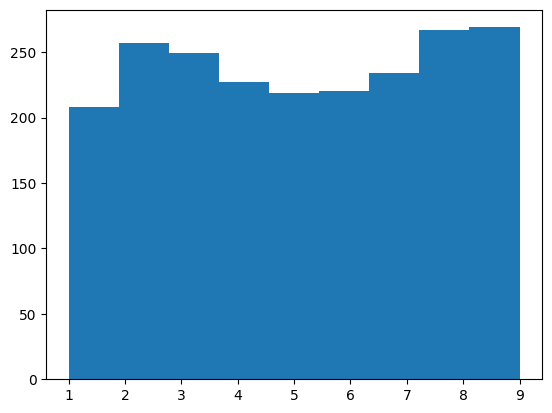

In [7]:
plt.hist(lista, 9) #histograma del uso de cada fondo